In [3]:
#imports and functions
import os
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
from adjustText import adjust_text
import pandas as pd
#functions for heirarchical clustering
from scipy.spatial.distance import pdist, cdist
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy
from sklearn.cluster import AgglomerativeClustering
from sklearn import decomposition
import sklearn
import seaborn
from scipy import stats


import numpy as np
#for plotting
cpallet = ["#6CC860","#8CC860","#C4E54C","#F7DD48","#F5A232","#FC8609","#FE6315"]
cpallet = cpallet*8


In [4]:
# find the list of files
os.chdir("/home/flan3@ad.wisc.edu/SICMA-analysis/BF/Summary/paperdata")
files = os.listdir()
files = [f for f in files if f.find("node") != -1]
files.sort()
files
prefix = [f[:-6] for f in files]
prefix

['AE-t0.5',
 'AE-t01',
 'AE-t03',
 'AE-t24',
 'AE-t48',
 'BG-t0.5',
 'BG-t01',
 'BG-t03',
 'BG-t24',
 'BG-t48',
 'BHIS-col1',
 'BHIS-col2',
 'DH-t0.5',
 'DH-t01',
 'DH-t03',
 'DH-t24',
 'DH-t48',
 'SBMcolrep1',
 'SBMcolrep2',
 'SimFinal',
 'delMPI']

In [5]:
#input the data as a dataframe where each row is one sample
dfs = []
for f in files:
    dfs.append(pd.read_csv(f, names = ["combo", "count"], header = 0, sep = "\t", index_col = 0).T)
sumtable = pd.concat(dfs, keys = prefix)
sumtable.index = sumtable.index.droplevel(1)
sumtable_counts = sumtable #save it as _counts before it get normalized in the next box
sumtable

,A--E---,-B-E---,ABDE---,A------,A-DE---,A-D----,AB-E---,A--E--H,---E---,A--E-G-,...,-BDEFG-,-BDEFGH,A-DEFG-,AB--FGH,AB-EFGH,ABD-F-H,ABD-FGH,ABDEF-H,ABDEFG-,ABDEFGH
AE-t0.5,11584.0000,4.0000,1.00000,120.000,50.00,11.0000,72.0000,28.00000,177.000,30.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AE-t01,9159.0000,31.0000,8.00000,435.000,124.00,22.0000,248.0000,64.00000,671.000,80.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AE-t03,3376.0000,192.0000,18.00000,928.000,187.00,90.0000,348.0000,102.00000,1331.000,107.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AE-t24,564.0000,202.0000,22.00000,1273.000,105.00,178.0000,174.0000,37.00000,834.000,65.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AE-t48,610.0000,257.0000,28.00000,1260.000,96.00,169.0000,192.0000,47.00000,807.000,86.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BG-t0.5,NaN,2.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BG-t01,1.0000,19.0000,NaN,24.000,NaN,NaN,NaN,NaN,8.000,1.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BG-t03,126.0000,306.0000,11.00000,508.000,20.00,53.0000,58.0000,3.00000,372.000,57.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BG-t24,760.0000,313.0000,30.00000,1654.000,105.00,225.0000,227.0000,52.00000,1073.000,83.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BG-t48,944.0000,351.0000,32.00000,1713.000,100.00,235.0000,243.0000,55.00000,1243.000,102.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#normalize the rows to get frequencies
sumtable = sumtable.div(sumtable.sum(axis=1), axis=0)
sumtable.fillna(0, inplace = True) #replace the NaN values with 0

#output this summary table to excel for further analysis
sumtable.to_csv("sumtable.csv")

sumtable

,A--E---,-B-E---,ABDE---,A------,A-DE---,A-D----,AB-E---,A--E--H,---E---,A--E-G-,...,-BDEFG-,-BDEFGH,A-DEFG-,AB--FGH,AB-EFGH,ABD-F-H,ABD-FGH,ABDEF-H,ABDEFG-,ABDEFGH
AE-t0.5,0.954752,0.000330,0.000082,0.009890,0.004121,0.000907,0.005934,0.002308,0.014588,0.002473,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
AE-t01,0.823577,0.002788,0.000719,0.039115,0.011150,0.001978,0.022300,0.005755,0.060336,0.007194,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
AE-t03,0.406992,0.023146,0.002170,0.111875,0.022544,0.010850,0.041953,0.012297,0.160458,0.012899,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
AE-t24,0.071069,0.025454,0.002772,0.160408,0.013231,0.022429,0.021925,0.004662,0.105091,0.008191,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
AE-t48,0.073326,0.030893,0.003366,0.151461,0.011540,0.020315,0.023080,0.005650,0.097007,0.010338,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
BG-t0.5,0.000000,0.001083,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
BG-t01,0.000107,0.002040,0.000000,0.002576,0.000000,0.000000,0.000000,0.000000,0.000859,0.000107,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
BG-t03,0.009240,0.022441,0.000807,0.037254,0.001467,0.003887,0.004253,0.000220,0.027281,0.004180,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
BG-t24,0.072360,0.029801,0.002856,0.157479,0.009997,0.021422,0.021613,0.004951,0.102161,0.007903,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
BG-t48,0.082338,0.030615,0.002791,0.149411,0.008722,0.020497,0.021195,0.004797,0.108417,0.008897,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00


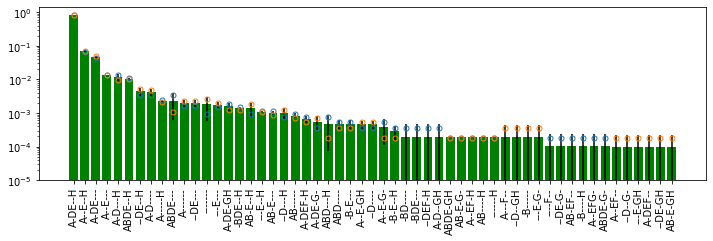

In [7]:
#Analysis of technical replicate colonies for technical variation

import matplotlib.pyplot as plot
#each replicate of SBM replicate each combination
BMMs = sumtable.loc[["SBMcolrep1", "SBMcolrep2"]]

#remove empty columns to save space
#first turn 0s into Nans
BMMs = BMMs.applymap(lambda x: x if x > 0 else np.nan)
#then drop Nan columns
BMMs = BMMs.dropna(axis = 1, how = "all")
#convert Nans back to zeros
BMMs = BMMs.fillna(0)

#calculate avg and std
avgBMMs = BMMs.mean(axis = 0)
stdBMMs = BMMs.std(axis = 0, ddof = 1)

#Sort bars by descending abundance
avgBMMs = avgBMMs.sort_values(ascending = False)
stdBMMs = stdBMMs.reindex(avgBMMs.index)

fig, ax = plot.subplots(figsize = (10, 3))
fig.tight_layout()
ax.bar(avgBMMs.index, avgBMMs, yerr = stdBMMs, bottom = 10e-6, color = "green")

#Also plot the data points as well
BMMs.reindex(avgBMMs.index)
for i, row in BMMs.iterrows():
    ax.plot(BMMs.columns, row, lw = 0, marker = "o", fillstyle = "none", ms = 5)

#remove "-" in tick labels
labs = list(avgBMMs.index)
#labs = [x.replace("-", "") for x in labs]

ax.set_xticklabels(labs, rotation = 90, size = 10)
#ax.set_ylim((10e-6, 1))
ax.set_yscale("log")
fig.savefig("./figures/figSBMcolbars.svg", format = "svg")

SpearmanrResult(correlation=0.8573100958932438, pvalue=3.8285384960827075e-38)


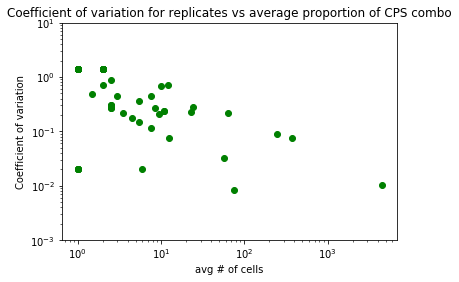

In [12]:
#Calculate CVs for each population
cvBMMs = stdBMMs/avgBMMs

#all this to get the unnormalized counts to plot avg # of cells for each population
countBMMs = sumtable_counts.loc[["SBMcolrep1", "SBMcolrep2"]]
avgcounts = countBMMs
avgcounts = countBMMs.mean(axis = 0)
cvBMMs = cvBMMs.reindex(avgcounts.index)
cvBMMs = cvBMMs.fillna(0)

#plot cv vs avg to see the distribution
plot.scatter(avgcounts, cvBMMs, color = "green")
plot.yscale("log")
plot.xscale("log")
plot.ylim((1e-3, 1e1))
#plot.xlim((1e-5, 1e1))
plot.xlabel("avg # of cells")
plot.ylabel("Coefficient of variation")
plot.title("Coefficient of variation for replicates vs average proportion of CPS combo")

plot.savefig("CV-frequency.svg")
print(stats.spearmanr(avgcounts.fillna(0), cvBMMs))


SpearmanrResult(correlation=nan, pvalue=nan)


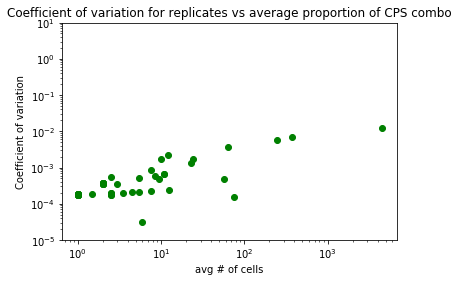

In [38]:
#Same plot as above but for range instead of CV
rangeBMMs = BMMs.diff().abs().iloc[1]

#all this to get the unnormalized counts to plot avg # of cells for each population
countBMMs = sumtable_counts.loc[["SBMcolrep1", "SBMcolrep2"]]
avgcounts = countBMMs.mean(axis = 0)
rangeBMMs = rangeBMMs.reindex(avgcounts.index)
rangeBMMs = rangeBMMs.fillna(0)

#plot cv vs avg to see the distribution
plot.scatter(avgcounts, rangeBMMs, color = "green")
plot.yscale("log")
plot.xscale("log")
plot.ylim((1e-5, 1e1))
#plot.xlim((1e-5, 1e1))
plot.xlabel("avg # of cells")
plot.ylabel("Coefficient of variation")
plot.title("Coefficient of variation for replicates vs average proportion of CPS combo")

plot.savefig("CV-frequency.svg")
print(stats.spearmanr(avgcounts, rangeBMMs))


In [ ]:
#calculate shannon entropies for each condition

#shannon entropy can only be compared when there samples have the same depth of sequencing, so we will remove all combinations <0.001 frequency, to simulate a rarefactioning to 1000 reads
shantable = sumtable.applymap(lambda x: 0 if x < 0.001 else x) #cutoff at 0.1% frequency
entropies = shantable.apply(stats.entropy, axis = 1) #calc the shan diversity
#pd.DataFrame(entropies).to_csv("shannondiversitiesall.csv")
pd.DataFrame(entropies)


In [11]:
#isolate subset of data corresponding to the synthetically induced samples
induction = [i for i in sumtable.index if i.find("t") != -1]
inductable = sumtable.loc[induction + ["SimFinal"]]
inductable

,A--E---,-B-E---,ABDE---,A------,A-DE---,A-D----,AB-E---,A--E--H,---E---,A--E-G-,...,-BDEFG-,-BDEFGH,A-DEFG-,AB--FGH,AB-EFGH,ABD-F-H,ABD-FGH,ABDEF-H,ABDEFG-,ABDEFGH
AE-t0.5,0.954752,0.000330,0.000082,0.009890,0.004121,0.000907,0.005934,0.002308,0.014588,0.002473,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
AE-t01,0.823577,0.002788,0.000719,0.039115,0.011150,0.001978,0.022300,0.005755,0.060336,0.007194,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
AE-t03,0.406992,0.023146,0.002170,0.111875,0.022544,0.010850,0.041953,0.012297,0.160458,0.012899,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
AE-t24,0.071069,0.025454,0.002772,0.160408,0.013231,0.022429,0.021925,0.004662,0.105091,0.008191,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
AE-t48,0.073326,0.030893,0.003366,0.151461,0.011540,0.020315,0.023080,0.005650,0.097007,0.010338,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
BG-t0.5,0.000000,0.001083,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
BG-t01,0.000107,0.002040,0.000000,0.002576,0.000000,0.000000,0.000000,0.000000,0.000859,0.000107,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
BG-t03,0.009240,0.022441,0.000807,0.037254,0.001467,0.003887,0.004253,0.000220,0.027281,0.004180,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
BG-t24,0.072360,0.029801,0.002856,0.157479,0.009997,0.021422,0.021613,0.004951,0.102161,0.007903,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
BG-t48,0.082338,0.030615,0.002791,0.149411,0.008722,0.020497,0.021195,0.004797,0.108417,0.008897,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00


In [12]:
#Calculate proportions for each Promoter ON
data = inductable
#get column labels to sum up
As = [x for x in data.columns if x.find("A") != -1]
Bs = [x for x in data.columns if x.find("B") != -1]
Ds = [x for x in data.columns if x.find("D") != -1]
Es = [x for x in data.columns if x.find("E") != -1]
Fs = [x for x in data.columns if x.find("F") != -1]
Gs = [x for x in data.columns if x.find("G") != -1]
Hs = [x for x in data.columns if x.find("H") != -1]

#sum up these columns to get rel abundance of the promoters
Aabun = data[As].sum(axis = 1)
Babun = data[Bs].sum(axis = 1)
Dabun = data[Ds].sum(axis = 1)
Eabun = data[Es].sum(axis = 1)
Fabun = data[Fs].sum(axis = 1)
Gabun = data[Gs].sum(axis = 1)
Habun = data[Hs].sum(axis = 1)

#make into dataframe
indep_promoters = pd.concat([Aabun, Babun, Dabun, Eabun, Fabun, Gabun, Habun], axis = 1)
indep_promoters.columns = "A,B,D,E,F,G,H".split(",")
indep_promoters

,A,B,D,E,F,G,H
AE-t0.5,0.983516,0.007088,0.005934,0.987060,0.001319,0.003214,0.003626
AE-t01,0.922399,0.031562,0.016995,0.943260,0.004316,0.011150,0.009172
AE-t03,0.671851,0.120675,0.067993,0.729717,0.014828,0.043761,0.030139
AE-t24,0.415827,0.219884,0.125882,0.319934,0.022303,0.113785,0.056956
AE-t48,0.416877,0.233321,0.123092,0.322635,0.018872,0.122370,0.061426
BG-t0.5,0.008663,0.981592,0.005414,0.004873,0.001624,0.970222,0.002166
BG-t01,0.027480,0.915522,0.009768,0.016316,0.003328,0.906398,0.006119
BG-t03,0.155837,0.572309,0.068862,0.116383,0.015694,0.505280,0.028821
BG-t24,0.407883,0.228887,0.120727,0.316862,0.019137,0.105494,0.057507
BG-t48,0.413694,0.225992,0.117401,0.332665,0.020148,0.110161,0.059573


Explained variance ratio: [0.40151848 0.36222735]


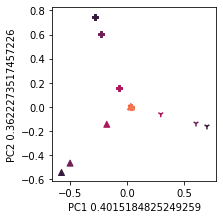

In [150]:
#PCA plot of the data

table = inductable

pca = decomposition.PCA(n_components=2) #make a PCA object
pca.fit(table) #fit the data to the PCA
X = pca.transform(table) #do a PCA transformation on the data

fig, axs = plt.subplots(figsize = [3, 3])
fig.tight_layout()
ax = axs

cpallet = cpallet = seaborn.color_palette("rocket")[:5]

plt.scatter(X[:5,0],X[:5,1], c = cpallet, label = table.index[:5], marker = "1")
plt.scatter(X[5:10,0],X[5:10,1], c = cpallet, label = table.index[5:10], marker = "^")
plt.scatter(X[10:15,0],X[10:15,1], c = cpallet, label = table.index[10:15], marker = "P")

ax.set_ylabel(f"PC2 {pca.explained_variance_ratio_[1]}")
ax.set_xlabel(f"PC1 {pca.explained_variance_ratio_[0]}")

#texts = [ax.annotate(table.index[i][:7], (X[i,0], X[i,1])) for i in range(len(table.index))]
#adjust_text(texts, arrowprops=dict(arrowstyle='-', color='red', lw = 0.5, alpha = 0.5), only_move = {'points':'xy', 'text':'xy', 'objects':'xy'}, ha = "center", va = "bottom")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
fig.savefig("./figures/PCA-induction.svg")

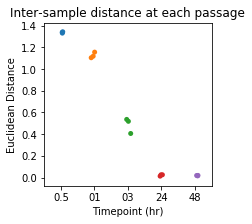

In [116]:
#For every passage, what is the euclidean distances between the samples? This will show whether they converge or not
table = inductable
Eucdist = pd.DataFrame(sklearn.metrics.pairwise.euclidean_distances(table, Y=None, Y_norm_squared=None, squared=False, X_norm_squared=None), index = table.index, columns = table.index)

timepoints = ["0.5", "01", "03", "24", "48"]
Eucdlist = []
for t in timepoints:
    dist = Eucdist[Eucdist.index.str.contains(f"{t}")]
    dist = dist.T[Eucdist.columns.str.contains(f"{t}")]
    Eucdlist.append(list(set([x for x in dist.values.flatten() if x > 0]))) #set removes duplicate values (cause the dist matrix is symmetric)

#Now plot them as scatter box plots
fig, ax = plt.subplots(figsize = (3,3))
seaborn.stripplot(data = pd.DataFrame(Eucdlist).T, ax = ax)
ax.set_xticklabels(timepoints)
ax.set_ylabel("Euclidean Distance")
ax.set_xlabel("Timepoint (hr)")
ax.set_title("Inter-sample distance at each passage")

fig.savefig("figures/induction-intereucdist.svg", format = "svg")

In [117]:
#output the timeseries data to excel
inductable.to_csv("induction_series.csv")

In [127]:
#Now work on the WT passaging colonies
path = "/home/flan3@ad.wisc.edu/SICMA-analysis/BF/Summary/paperdata/passaging/"
os.chdir(path)
files = os.listdir()
files = [f for f in files if f.find("xls") != -1]
files.sort() #order the files 
dfs = []


for f in files:
    dfs.append(pd.read_excel(f, index_col = 0, names = ("combo", f[:-5])).T)
passages = pd.concat(dfs, names = files)

#normalize the rows to get frequencies
passages = passages.div(passages.sum(axis=1), axis=0)
passages.fillna(0, inplace = True) #replace the NaN values with 0
passages.to_csv("allwtpassages.csv") 

#passages = pd.read_csv("allwtpassages.csv", index_col = 0)
passages

,A----G-,A-D--G-,-----G-,AB---G-,AB-E-G-,A------,A--E-G-,A----GH,A-D----,ABD--G-,...,-BD-FG-,ABDEF-H,----FGH,--DEF-H,ABDEFG-,--DE-GH,ABD--GH,-BD--GH,-B-EFGH,--DEFG-
c1p00,0.782553,0.023910,0.015186,0.037803,0.001616,0.083683,0.012924,0.010016,0.010016,0.001292,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
c1p07,0.076062,0.002466,0.009863,0.008725,0.001707,0.569613,0.014416,0.003414,0.014226,0.000379,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
c1p13,0.226455,0.012858,0.037769,0.035198,0.018483,0.062842,0.123594,0.014947,0.000964,0.001607,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
c1p20,0.024395,0.002734,0.008202,0.005258,0.003575,0.059937,0.013249,0.004837,0.002103,0.000210,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
c2p00,0.000000,0.000000,0.000000,0.000422,0.000000,0.003239,0.000141,0.000141,0.000282,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
c2p07,0.001310,0.000000,0.001310,0.000374,0.000000,0.037418,0.000374,0.000000,0.001497,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
c2p13,0.000772,0.000000,0.002317,0.000579,0.000000,0.078571,0.000193,0.000000,0.002124,0.000193,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
c2p20,0.002961,0.000156,0.006234,0.001247,0.000468,0.037874,0.002338,0.000779,0.000779,0.000156,...,0.000312,0.000468,0.000156,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
c3p00,0.012523,0.000228,0.790756,0.000455,0.000228,0.002960,0.000911,0.000455,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
c3p07,0.001082,0.000000,0.018611,0.000000,0.000000,0.091106,0.000216,0.000000,0.001298,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [2]:
#Calculate proportions for each Promoter ON
data = passages
#get column labels to sum up
As = [x for x in data.columns if x.find("A") != -1]
Bs = [x for x in data.columns if x.find("B") != -1]
Ds = [x for x in data.columns if x.find("D") != -1]
Es = [x for x in data.columns if x.find("E") != -1]
Fs = [x for x in data.columns if x.find("F") != -1]
Gs = [x for x in data.columns if x.find("G") != -1]
Hs = [x for x in data.columns if x.find("H") != -1]

#sum up these columns to get rel abundance of the promoters
Aabun = data[As].sum(axis = 1)
Babun = data[Bs].sum(axis = 1)
Dabun = data[Ds].sum(axis = 1)
Eabun = data[Es].sum(axis = 1)
Fabun = data[Fs].sum(axis = 1)
Gabun = data[Gs].sum(axis = 1)
Habun = data[Hs].sum(axis = 1)

#make into dataframe
indep_promoters = pd.concat([Aabun, Babun, Dabun, Eabun, Fabun, Gabun, Habun], axis = 1)
indep_promoters.columns = "A,B,D,E,F,G,H".split(",")
indep_promoters

NameError: name 'passages' is not defined

In [128]:
#calculate shannon entropies for each condition
from scipy import stats

#shannon entropy can only be compared when there samples have the same depth of sequencing, so we will remove all combinations <0.001 frequency, to simulate a rarefactioning to 1000 reads
shantable = passages.applymap(lambda x: 0 if x < 0.001 else x) #cutoff at 0.1% frequency
entropies = shantable.apply(stats.entropy, axis = 1) #calc the shan diversity
#pd.DataFrame(entropies).to_csv("shannondiversitiesall.csv")
pd.DataFrame(entropies)

,0
c1p00,0.919900
c1p07,1.807582
c1p13,2.919544
c1p20,3.113845
c2p00,1.026782
c2p07,1.962971
c2p13,2.383765
c2p20,3.184166
c3p00,0.799173
c3p07,1.599461


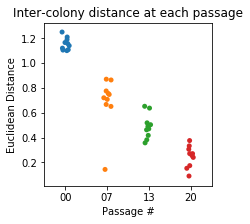

In [133]:
#For every passage, what is the euclidean distances between the samples? This will show whether they converge or not
Eucdist = pd.DataFrame(sklearn.metrics.pairwise.euclidean_distances(passages, Y=None, Y_norm_squared=None, squared=False, X_norm_squared=None), index = passages.index, columns = passages.index)

#Grab all entries corresponding to passage 0
plist = ["00", "07", "13", "20"]
Eucdlist = []
for p in plist:
    dist = Eucdist[Eucdist.index.str.contains(f"p{p}")]
    dist = dist.T[Eucdist.columns.str.contains(f"p{p}")]
    Eucdlist.append(list(set([x for x in dist.values.flatten() if x > 0]))) #set removes duplicate values (cause the dist matrix is symmetric)
    
#Now plot them as scatter box plots
fig, ax = plt.subplots(figsize = (3,3))
#ax.boxplot(Eucdlist, whis = 1)
#seaborn.violinplot(data = Eucdlist, ax = ax)
seaborn.stripplot(data = Eucdlist, ax = ax)
ax.set_xticklabels(plist)
ax.set_ylabel("Euclidean Distance")
ax.set_xlabel("Passage #")
ax.set_title("Inter-colony distance at each passage")

fig.savefig("colonies-psg-intereucdist.svg", format = "svg")

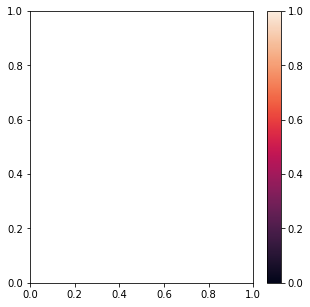

In [170]:
fig, ax = plt.subplots(1,1, figsize = [5, 5])

fig.colorbar(plt.cm.ScalarMappable(cmap=seaborn.color_palette("rocket", as_cmap = True)), ax=ax)


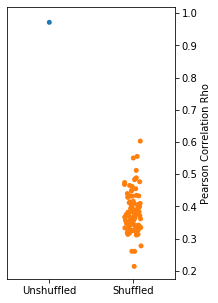

In [19]:
#stripp plot or violin plot of the rhos for WT passage 
#rhos = pd.read_excel("passaging/WT-psg-mcmc-rho_hist.xlsx")

#for induced timeseries Rhos
rhos = pd.read_excel("passaging/inducible_rho_hist.xlsx")


fig, ax = plt.subplots(figsize = (3,5))
#ax.boxplot(Eucdlist, whis = 1)
#seaborn.violinplot(data = rhos, ax = ax)
seaborn.stripplot(data = rhos, ax = ax)
ax.set_xticklabels(rhos.columns)
ax.yaxis.set_label_position("right")
ax.yaxis.set_ticks_position("right")

ax.set_ylabel("Pearson Correlation Rho")
fig.savefig("induciblepsg-rhocomparison.svg")

,Unshuffled,Shuffled
0,0.798587,0.369078
1,NaN,0.452698
2,NaN,0.462225
3,NaN,0.504414
4,NaN,0.553656
...,...,...
95,NaN,0.412084
96,NaN,0.447020
97,NaN,0.539927
98,NaN,0.501888
